In [437]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn import datasets
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = datasets.load_iris()
url ="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"


# Lendo os dados

In [438]:
df = pd.read_csv(url)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [439]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [440]:
df.species = df.species.map({'setosa':0, 'virginica':1, 'versicolor':2})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


# Analisando os dados do DataSet Iris

In [441]:
df['species'].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='species'>

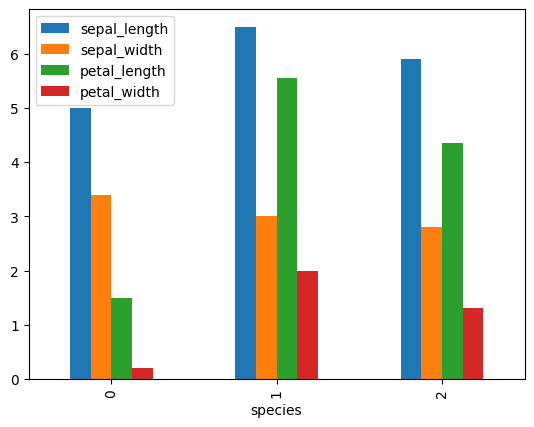

In [442]:
df.groupby('species').median().plot(kind='bar')

In [443]:
headers_list = df.columns.values.tolist()

In [444]:
cm = np.corrcoef(df[headers_list].values.T)

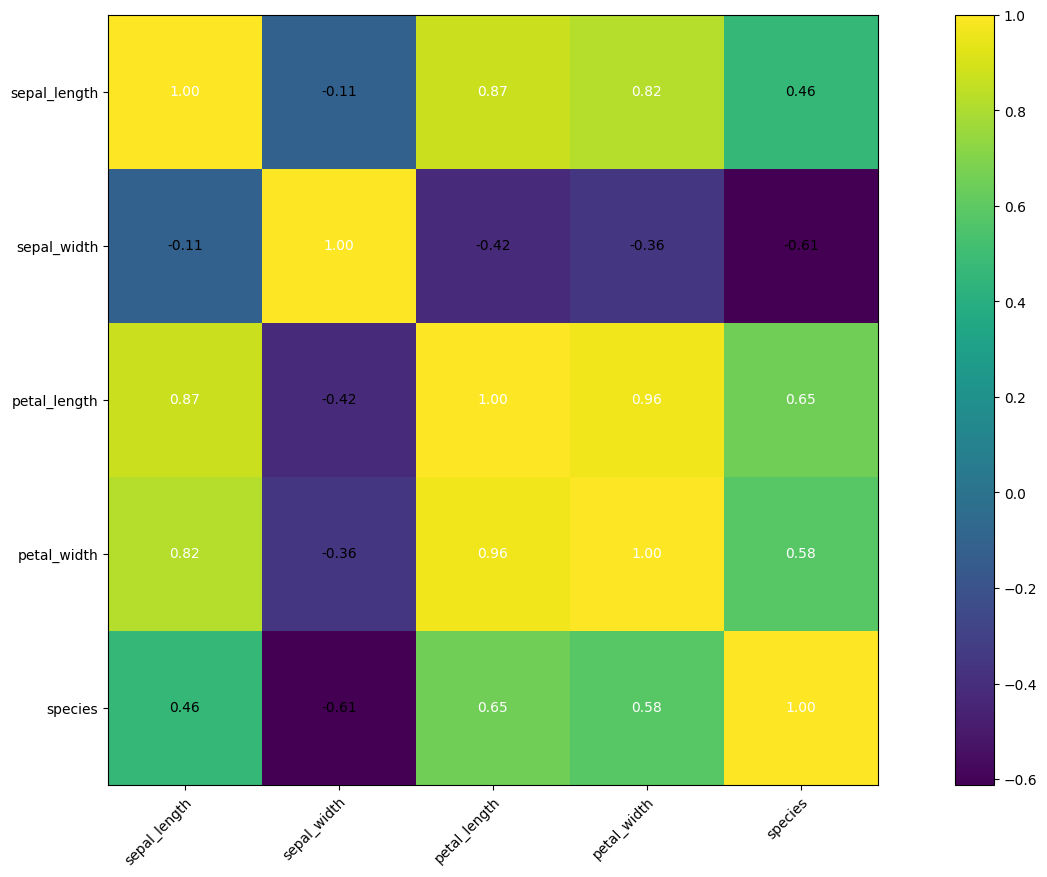

In [445]:
# Checando a coorelação entre as variáveis

hm = heatmap(cm, row_names= headers_list,column_names= headers_list, figsize=[20,10])
plt.show()


### Conclusão
O DataSet oferece uma distribução de flores, suas caracteristicas físicas e sua respectiva especies. Com isso irei utilizar as caracteristicas mais relevantes de cada flor para determinar qual especie ela é. Todas a caracteristas são úteis para poder fazer o modelo, exceto a 'Sepal Width', essa é a única caracteristica que não será relevante para a criação do modelo

## Separando X e y

In [446]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [447]:
data = df.to_numpy()
data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [448]:
data.shape

(150, 5)

In [449]:
X = data[:,:-1]

y = data[:, -1]


In [450]:
print(X)
X.shape

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

(150, 4)

In [451]:
print(y)
y.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


(150,)

In [452]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [453]:
X_train.shape

(112, 4)

In [454]:
X_test.shape

(38, 4)

# Tratamento de Dados

#### Converter cada array de Numpy em Tensores

In [455]:
X_test_T = torch.tensor(X_test)
X_train_T = torch.tensor(X_train)
y_test_T = torch.tensor(y_test)
y_train_T = torch.tensor(y_train)



In [456]:

class Iris_Dataset(Dataset):
    
    def __init__(self,X,y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self,idx):
        return self.X[idx],self.y[idx]
    
    
# 

## Data Loader

In [457]:
train_dl = DataLoader(Iris_Dataset(X_train_T, y_train_T),  batch_size = len(X_train_T) )
test_dl  = DataLoader(Iris_Dataset(X_test_T, y_test_T),  batch_size = len(X_test_T) )
                             
   

# Criando o Modelo MLP

In [458]:
# Criar uma classe que herda o modulo nn.Module
class MLP_Model(nn.Module):
    
    def __init__(self):
        super(MLP_Model,self).__init__()
        
        # nn.Linear(a,b) --> a entrada, b mapeia ?
        # O primeiro neurônio tem 4 no parênteses pois o data set tem 4 caracteristicas no X,  
        
        self.L1 =  nn.Linear(4,32)
        
        
        
        self.A1 =  nn.ReLU()
        
        # No segundo, receberá o tanto que saiu na layer passada, logo:
        # nn.Linear(c,d) --> c == a, d == quantidasde que sera y previsto, ex: probabilidade de ser cada uma das flores
        
        self.L2 =  nn.Linear(32,16)
        
        self.L3 =  nn.Linear(16,8)
        
        self.L4 =  nn.Linear(8,3) 
        
        # SoftMax é uma função para classificação, ela é similar à função sigmoid
        
        self.A2 = nn.Softmax()
        
    def forward(self, x):
        
        
        
        x = self.L1(x)
        
        
        # Aqui estou transformando o vetor inicial de 4 em um vetor de 5
        
        x = self.A1(x)
       
        
        # Escalando o vetor via função sigmoid, outra possivel é a função reLU --> ler mais sobre
        
        x = self.L2(x)
        
        
        x = self.A1(x)
        
        x = self.L3(x)
        
        x = self.A1(x)
        
        x = self.L4(x)
        
        # Aqui estou transformando o vetor modificado de tamanho 5 em um vetor de 3
        
        x = self.A2(x)
        
        
        
        return x       

In [459]:
L1_value_before_train = torch.histogram(MLP_Model().L1.weight.detach())

X_L1_before = L1_value_before_train[1][0:100]
y_L1_before = L1_value_before_train[0]




In [460]:
L2_value_before_train = torch.histogram(MLP_Model().L1.weight.detach())

X_L2_before = L2_value_before_train[1][0:100]
y_L2_before = L2_value_before_train[0]


In [461]:
L4_value_before_train = torch.histogram(MLP_Model().L4.weight.detach())

X_L4_before = L4_value_before_train[1][0:100]
y_L4_before = L4_value_before_train[0]


# Treino


--> Rascunho


In [462]:

def training( N_Epochs, model, loss_fn, opt  ):
    
    loss_list = []
    
    for epoch in range(N_Epochs+1):
        for xb, yb in train_dl:
            
            
            
            y_pred = model(xb.float())
            loss   = loss_fn(y_pred, yb.long())
            
            print(model.L1)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        
            print(epoch, "loss=", loss.item())
            loss_list.append(loss.item())
            
    
    plt.figure(figsize = (14,6))
    plt.title("cost decay")
    plt.plot(loss_list)
    plt.xlabel("epoch")
    plt.ylabel("cost")
            




Linear(in_features=4, out_features=32, bias=True)
0 loss= 1.1138166189193726
Linear(in_features=4, out_features=32, bias=True)
1 loss= 1.1097848415374756
Linear(in_features=4, out_features=32, bias=True)
2 loss= 1.1061347723007202
Linear(in_features=4, out_features=32, bias=True)
3 loss= 1.102584958076477
Linear(in_features=4, out_features=32, bias=True)
4 loss= 1.0989558696746826
Linear(in_features=4, out_features=32, bias=True)
5 loss= 1.0950734615325928
Linear(in_features=4, out_features=32, bias=True)
6 loss= 1.0889097452163696
Linear(in_features=4, out_features=32, bias=True)
7 loss= 1.083735704421997
Linear(in_features=4, out_features=32, bias=True)
8 loss= 1.080936312675476
Linear(in_features=4, out_features=32, bias=True)
9 loss= 1.0782091617584229
Linear(in_features=4, out_features=32, bias=True)
10 loss= 1.0754960775375366
Linear(in_features=4, out_features=32, bias=True)
11 loss= 1.0725913047790527
Linear(in_features=4, out_features=32, bias=True)
12 loss= 1.0696088075637817

c:\Users\erick\OneDrive\Desktop\Estudos\Python\Pesquisa\.conda\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Linear(in_features=4, out_features=32, bias=True)
72 loss= 0.7623337507247925
Linear(in_features=4, out_features=32, bias=True)
73 loss= 0.7604597806930542
Linear(in_features=4, out_features=32, bias=True)
74 loss= 0.7585917115211487
Linear(in_features=4, out_features=32, bias=True)
75 loss= 0.756747841835022
Linear(in_features=4, out_features=32, bias=True)
76 loss= 0.7549142241477966
Linear(in_features=4, out_features=32, bias=True)
77 loss= 0.753080427646637
Linear(in_features=4, out_features=32, bias=True)
78 loss= 0.7512784004211426
Linear(in_features=4, out_features=32, bias=True)
79 loss= 0.7494322657585144
Linear(in_features=4, out_features=32, bias=True)
80 loss= 0.7475391030311584
Linear(in_features=4, out_features=32, bias=True)
81 loss= 0.7455633282661438
Linear(in_features=4, out_features=32, bias=True)
82 loss= 0.7435558438301086
Linear(in_features=4, out_features=32, bias=True)
83 loss= 0.7414904832839966
Linear(in_features=4, out_features=32, bias=True)
84 loss= 0.73935

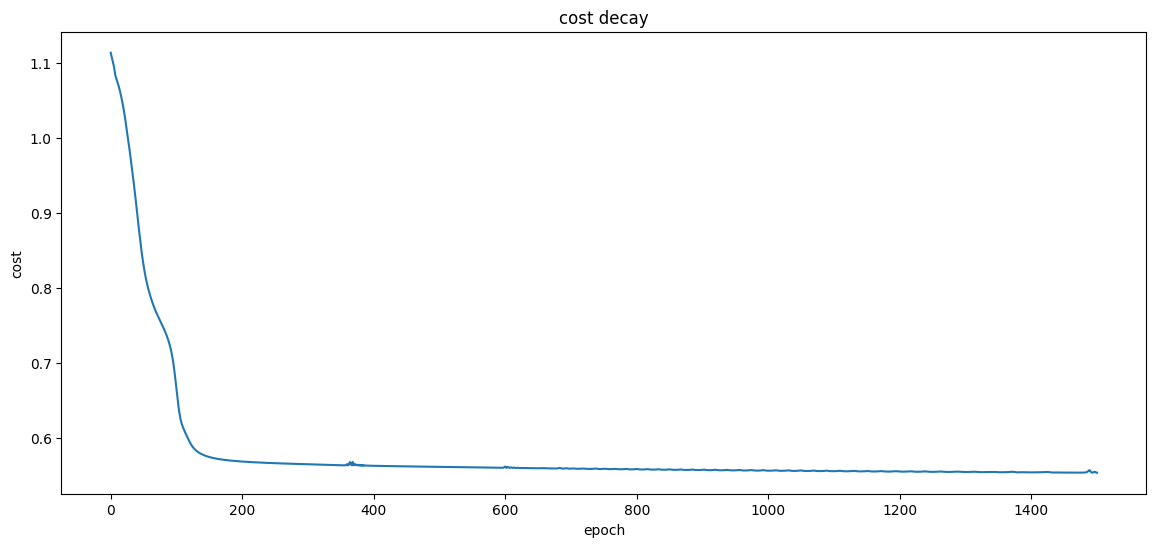

In [463]:
model = MLP_Model()

epochs = 1500

opt        = torch.optim.Adam( model.parameters(), lr=0.003 )

loss_fn    = nn.CrossEntropyLoss( )   

training(  epochs, model , loss_fn, opt  )


# Avaliação do Modelo

In [464]:
with torch.no_grad():
    model.eval()
    
    for xb, yb in test_dl:
        
        
        y_pred = model(xb.float())



    
    yf = torch.argmax(y_pred, dim=1)
    
    print(classification_report(yb, yf))        
        
            
            
    
# Dropoup --> apagar saida de um neuronio
# argmax --> pega o ag

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.90      1.00      0.95         9
         2.0       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# Fazendo Histograma dos valores de cada layer

In [465]:
MLP_Model().L1.weight

Parameter containing:
tensor([[-0.4746, -0.0673,  0.4899, -0.1393],
        [-0.4257, -0.2562,  0.4201, -0.3573],
        [ 0.3445,  0.2406,  0.3252,  0.1989],
        [ 0.4092, -0.1223, -0.2997,  0.4926],
        [ 0.0779,  0.2813,  0.1269, -0.2929],
        [-0.3356,  0.0752,  0.2826, -0.4873],
        [ 0.1324, -0.1722,  0.4413, -0.4132],
        [ 0.3515,  0.2909,  0.2519,  0.3084],
        [ 0.4792, -0.2626, -0.3330,  0.0784],
        [ 0.2355, -0.1001,  0.3901,  0.4669],
        [-0.0998, -0.1399, -0.3720, -0.3061],
        [-0.1323,  0.0309, -0.4085, -0.2757],
        [-0.3406, -0.1439,  0.3916, -0.0374],
        [-0.0741, -0.2498, -0.3356, -0.1993],
        [-0.2533,  0.2322,  0.4133, -0.0915],
        [ 0.3932,  0.4986,  0.0821,  0.2907],
        [ 0.3168,  0.3013, -0.3661,  0.4692],
        [-0.2353,  0.2726,  0.0329, -0.4562],
        [-0.4886, -0.0332,  0.3554, -0.3703],
        [-0.1544, -0.2998, -0.1603,  0.1408],
        [ 0.0763, -0.2016, -0.4042,  0.2566],
        [-0.

In [466]:
MLP_Model().L1.weight.shape

torch.Size([32, 4])

In [467]:
MLP_Model().L1.weight[0][0]

tensor(0.3013, grad_fn=<SelectBackward0>)

In [468]:

# Vou ver somente de um neuronio, o 1o da layer 1

def training_alt( N_Epochs, model, loss_fn, opt  ):
    
    output_list = []
    
    for epoch in range(N_Epochs+1):
        for xb, yb in train_dl:
            
            
            
            y_pred = model(xb.float())
            loss   = loss_fn(y_pred, yb.long())
            
            output = MLP_Model().L1.weight[0][0]
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        
            print(epoch, "loss=", loss.item())
            output_list.append(output.item())
            
    
    plt.figure(figsize = (14,6))
    plt.title("Value")
    plt.plot(output_list)
    plt.xlabel("epoch")
    plt.ylabel("cost")
            



In [469]:
model = MLP_Model()

epochs = 1500

opt        = torch.optim.Adam( model.parameters(), lr=0.003 )

loss_fn    = nn.CrossEntropyLoss( )   

#training_alt(  epochs, model , loss_fn, opt  )

In [470]:
L1_value_after_train = torch.histogram(MLP_Model().L1.weight.detach())

X_L1_after =L1_value_after_train[1][0:100]
y_L1_after =L1_value_after_train[0]


In [471]:
L2_value_after_train = torch.histogram(MLP_Model().L2.weight.detach())

X_L2_after = L2_value_after_train[1][0:100]
y_L2_after = L2_value_after_train[0]


In [472]:
L4_value_after_train = torch.histogram(MLP_Model().L2.weight.detach())

X_L4_after = L4_value_after_train[1][0:100]
y_L4_after = L4_value_after_train[0]

## Histograms
### Linear 1

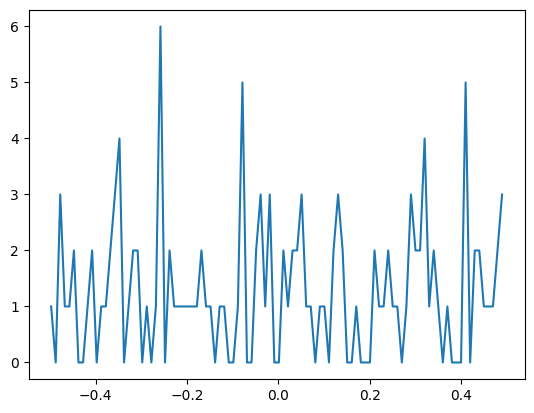

In [473]:
hist_before_train = plt.plot(X_L1_before,y_L1_before)

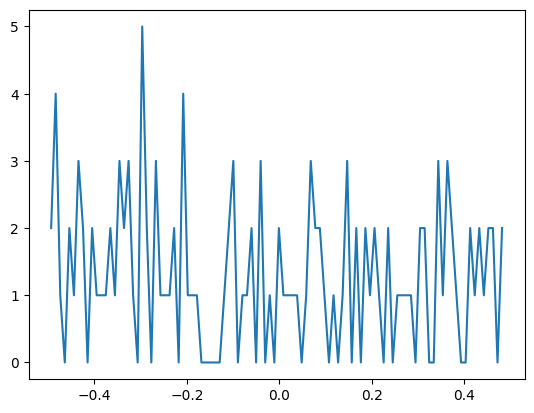

In [474]:
hist_after_train = plt.plot(X_L1_after,y_L1_after)

### Linear 2

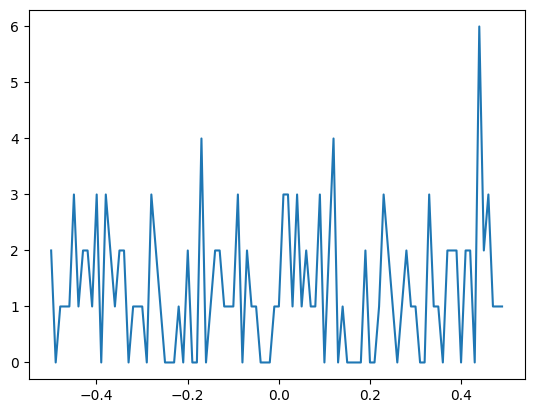

In [475]:
hist_before_train = plt.plot(X_L2_before,y_L2_before)

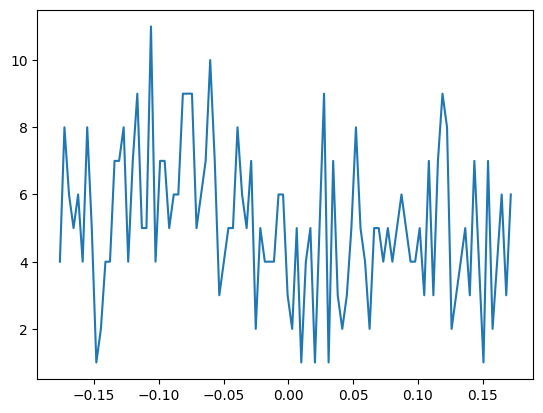

In [476]:
hist_after_train = plt.plot(X_L2_after,y_L2_after)

### Linear 4

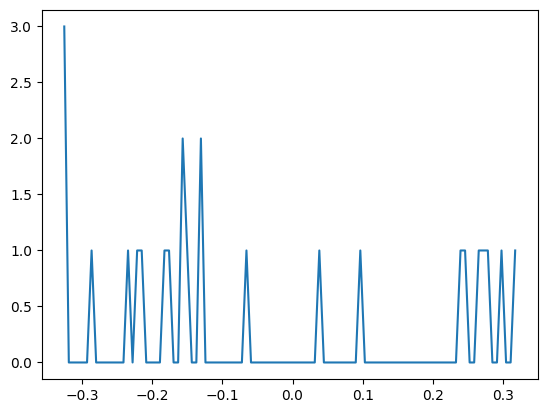

In [477]:
hist_before_train = plt.plot(X_L4_before,y_L4_before)

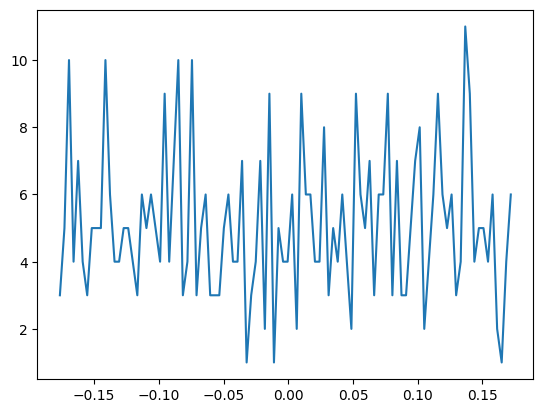

In [478]:
hist_after_train = plt.plot(X_L4_after,y_L4_after)